<a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://user-images.githubusercontent.com/26833433/98702494-b71c4e80-237a-11eb-87ed-17fcd6b3f066.jpg">

This notebook was written by Ultralytics LLC, and is freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/). 
For more information please visit https://github.com/ultralytics/yolov5 and https://www.ultralytics.com.



### ******* MOLA Validation by Nuno Costa ********

# Setup

Clone repo, install dependencies and check PyTorch and GPU.

#WARNING: if updating yolov5: 1) copy yolov5 folder to old; 2) git clone yolov5  (this way the wieghts are removed from previous version)

#NOTE: Start by testing the Appendix in the end of the tutorial

In [1]:
'''
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies - #BUG matplotlib in pip install
'''

'\n!git clone https://github.com/ultralytics/yolov5  # clone repo\n%cd yolov5\n%pip install -qr requirements.txt  # install dependencies - #BUG matplotlib in pip install\n'

In [3]:
#shell directory
%cd yolov5

C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\yolov5


In [2]:
# DIRs [needed if you use %cd command multiple times or use the shell with different paths]
import sys
import os
#script dir 
scriptdir=sys.path[0] #os.getcwd()
#yolov5 Dir
yolov5_dir=os.path.join(scriptdir, 'yolov5/')
print(yolov5_dir)
#json2yolo Dir
json2yolo_dir=os.path.join(scriptdir, 'json2yolo/')
print(json2yolo_dir)

C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\yolov5/
C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\json2yolo/


In [4]:
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.7.0 _CudaDeviceProperties(name='GeForce GTX 1070', major=6, minor=1, total_memory=8192MB, multi_processor_count=16)


# 1. Inference

`detect.py` runs inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases).

In [5]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/ --device 0

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='0', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='data/images/', update=False, view_img=False, weights=['yolov5s.pt'])
Fusing layers... 


Using torch 1.7.0 CUDA:0 (GeForce GTX 1070, 8192MB)

Model Summary: 232 layers, 7459581 parameters, 0 gradients


image 1/2 C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\yolov5\data\images\bus.jpg: 640x480 4 persons, 1 buss, 1 skateboards, Done. (0.033s)
image 2/2 C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\yolov5\data\images\zidane.jpg: 384x640 2 persons, 2 ties, Done. (0.014s)
Results saved to runs\detect\exp7
Done. (1.933s)


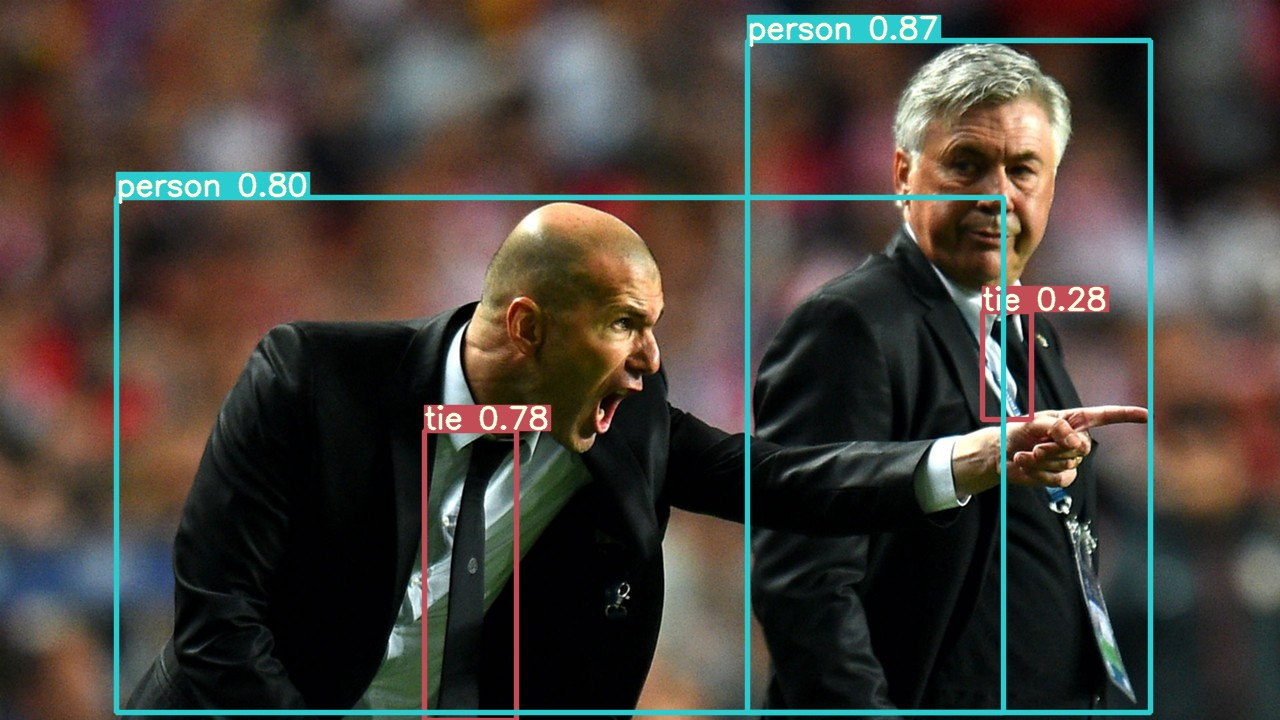

In [6]:
Image(filename='runs/detect/exp/zidane.jpg', width=600)

Results are saved to `runs/detect`. A full list of available inference sources:
<img src="https://user-images.githubusercontent.com/26833433/98274798-2b7a7a80-1f94-11eb-91a4-70c73593e26b.jpg" width="900"> 

# 2. Test
Test a model on [COCO](https://cocodataset.org/#home) val or test-dev dataset to evaluate trained accuracy. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases). To show results by class use the `--verbose` flag. Note that `pycocotools` metrics may be 1-2% better than the equivalent repo metrics, as is visible below, due to slight differences in mAP computation.

## COCO val2017
Download [COCO val 2017](https://github.com/ultralytics/yolov5/blob/74b34872fdf41941cddcf243951cdb090fbac17b/data/coco.yaml#L14) dataset (1GB - 5000 images), and test model accuracy.

In [ ]:
'''
# Download COCO val2017
torch.hub.download_url_to_file('https://github.com/ultralytics/yolov5/releases/download/v1.0/coco2017val.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../ && rm tmp.zip
'''

In [ ]:
#YAML Paths # coco val2017 yaml
datasetyaml=os.path.join(scriptdir, 'yolov5/data/coco.yaml')

In [ ]:
# Run YOLOv5x on COCO val2017
#runing from external: coco_external.yaml
!python test.py --weights yolov5s.pt --data $datasetyaml --img 640 --device 0

## COCO test-dev2017
Download [COCO test2017](https://github.com/ultralytics/yolov5/blob/74b34872fdf41941cddcf243951cdb090fbac17b/data/coco.yaml#L15) dataset (7GB - 40,000 images), to test model accuracy on test-dev set (20,000 images). Results are saved to a `*.json` file which can be submitted to the evaluation server at https://competitions.codalab.org/competitions/20794.

In [ ]:
'''
# Download COCO test-dev2017
torch.hub.download_url_to_file('https://github.com/ultralytics/yolov5/releases/download/v1.0/coco2017labels.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../ && rm tmp.zip  # unzip labels
!f="test2017.zip" && curl http://images.cocodataset.org/zips/$f -o $f && unzip -q $f && rm $f  # 7GB,  41k images
%mv ./test2017 ./coco/images && mv ./coco ../  # move images to /coco and move /coco next to /yolov5
'''

In [ ]:
#YAML Paths # coco val2017 yaml
datasetyaml=os.path.join(scriptdir, 'coco_external.yaml')

In [ ]:
# Run YOLOv5s on COCO test-dev2017 using --task test
!python test.py --weights yolov5s.pt --data $datasetyaml --task test

# 3. Train

Download [COCO128](https://www.kaggle.com/ultralytics/coco128), a small 128-image tutorial dataset, start tensorboard and train YOLOv5s from a pretrained checkpoint for 3 epochs (note actual training is typically much longer, around **300-1000 epochs**, depending on your dataset).

In [ ]:
'''
# Download COCO128
torch.hub.download_url_to_file('https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../ && rm tmp.zip
'''

In [9]:
#YAML Paths # coco128 yaml
datasetyaml=os.path.join(scriptdir, 'coco128_external.yaml')

Train a YOLOv5s model on [COCO128](https://www.kaggle.com/ultralytics/coco128) with `--data coco128.yaml`, starting from pretrained `--weights yolov5s.pt`, or from randomly initialized `--weights '' --cfg yolov5s.yaml`. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and **COCO, COCO128, and VOC datasets are downloaded automatically** on first use.

All training results are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.


In [10]:
# Start tensorboard (optional)
%load_ext tensorboard
%tensorboard --logdir runs

Reusing TensorBoard on port 6006 (pid 12784), started 0:48:55 ago. (Use '!kill 12784' to kill it.)

In [11]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 3 --data $datasetyaml --weights yolov5s.pt --nosave --cache



Analyzing anchors... anchors/target = 4.26, Best Possible Recall (BPR) = 0.9946
                 all         128         929       0.407        0.76         0.7       0.448
                 all         128         929         0.4       0.762       0.699        0.45
                 all         128         929       0.403       0.771       0.703       0.454

Using torch 1.7.0 CUDA:0 (GeForce GTX 1070, 8192MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=True, cfg='', data='C:\\Users\\nmc_costa\\google_drive\\projects\\bosch_P19\\research\\python_ws\\violent_action\\yolo\\coco128_external.yaml', device='', epochs=3, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], local_rank=-1, log_imgs=16, multi_scale=False, name='exp', noautoanchor=False, nosave=True, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs\\train\\exp', single_cls=False, sync_bn=False, total_batch_size=16, weights='yolov5s.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'box': 0.05, 'cls': 0.5, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0


Optimizer stripped from runs\train\exp\weights\last.pt, 15.2MB
Optimizer stripped from runs\train\exp\weights\best.pt, 15.2MB




 19          [-1, 14]  1         0  models.common.Concat                    [1]                           
 20                -1  1    313088  models.common.BottleneckCSP             [256, 256, 1, False]          
 21                -1  1    590336  models.common.Conv                      [256, 256, 3, 2]              
 22          [-1, 10]  1         0  models.common.Concat                    [1]                           
 23                -1  1   1248768  models.common.BottleneckCSP             [512, 512, 1, False]          
 24      [17, 20, 23]  1    229245  models.yolo.Detect                      [80, [[10, 13, 16, 30, 33, 23], [30, 61, 62, 45, 59, 119], [116, 90, 156, 198, 373, 326]], [128, 256, 512]]
Model Summary: 283 layers, 7468157 parameters, 7468157 gradients

Transferred 370/370 items from yolov5s.pt
Optimizer groups: 62 .bias, 70 conv.weight, 59 other
wandb: Currently logged in as: nbugz (use `wandb login --relogin` to force relogin)
wandb: Tracking run with wandb vers

# 4. Visualize

## Weights & Biases Logging 🌟 NEW

[Weights & Biases](https://www.wandb.com/) (W&B) is now integrated with YOLOv5 for real-time visualization and cloud logging of training runs. This allows for better run comparison and introspection, as well improved visibility and collaboration for teams. To enable W&B logging install `wandb`, and then train normally (you will be guided through setup on first use).
```bash
$ pip install wandb
```

During training you will see live updates at [https://www.wandb.com/](https://www.wandb.com/), and you can create and share detailed [Reports](https://wandb.ai/glenn-jocher/yolov5_tutorial/reports/YOLOv5-COCO128-Tutorial-Results--VmlldzozMDI5OTY) of your results. For more information see the [YOLOv5 Weights & Biases Tutorial](https://github.com/ultralytics/yolov5/issues/1289). 

<img src="https://user-images.githubusercontent.com/26833433/98184457-bd3da580-1f0a-11eb-8461-95d908a71893.jpg" width="800">

## Local Logging

All results are logged by default to `runs/train`, with a new experiment directory created for each new training as `runs/train/exp2`, `runs/train/exp3`, etc. View train and test jpgs to see mosaics, labels, predictions and augmentation effects. Note a **Mosaic Dataloader** is used for training (shown below), a new concept developed by Ultralytics and first featured in [YOLOv4](https://arxiv.org/abs/2004.10934).

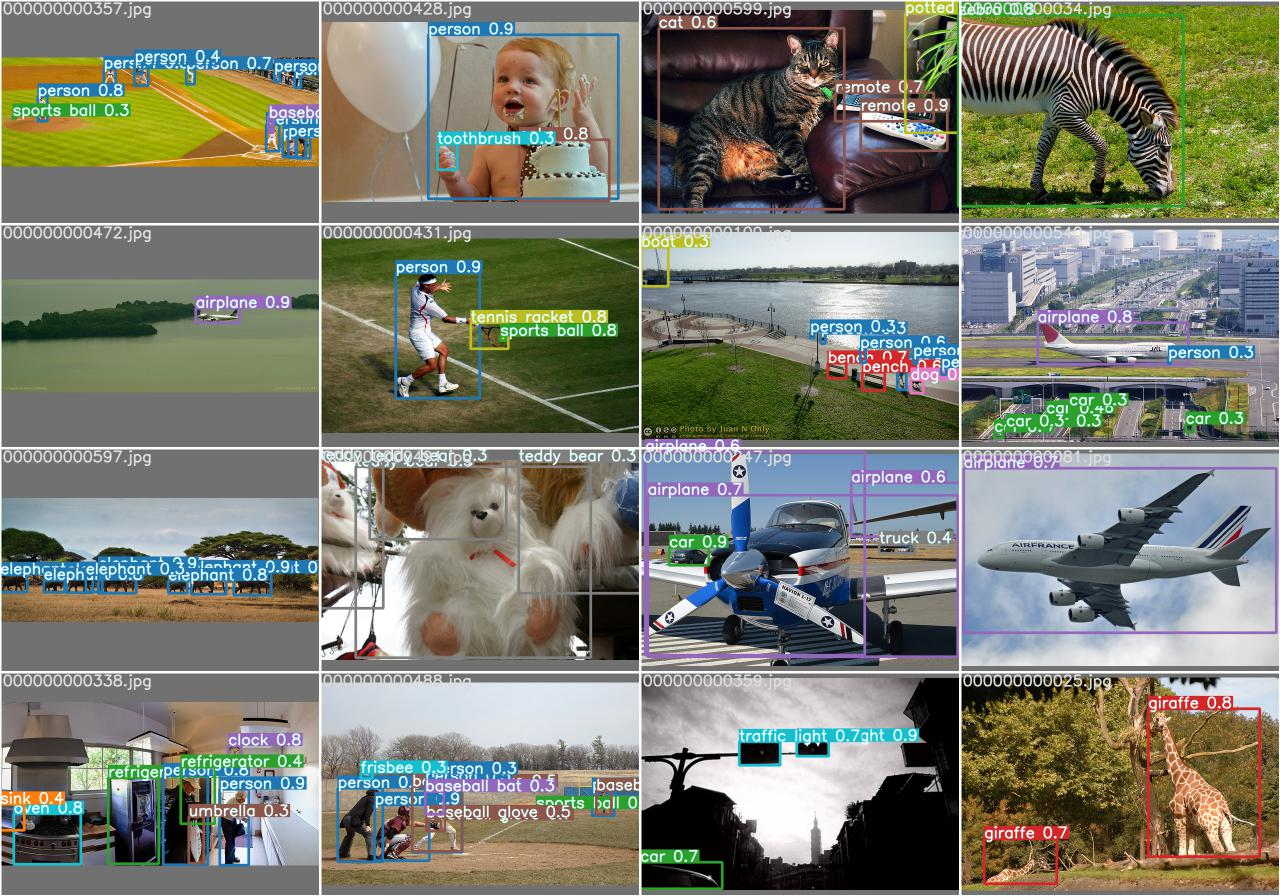

In [13]:
Image(filename='runs/train/exp/train_batch0.jpg', width=800)  # train batch 0 mosaics and labels
Image(filename='runs/train/exp/test_batch0_labels.jpg', width=800)  # test batch 0 labels
Image(filename='runs/train/exp/test_batch0_pred.jpg', width=800)  # test batch 0 predictions

> <img src="https://user-images.githubusercontent.com/26833433/83667642-90fcb200-a583-11ea-8fa3-338bbf7da194.jpeg" width="750">  
`train_batch0.jpg` shows train batch 0 mosaics and labels

> <img src="https://user-images.githubusercontent.com/26833433/83667626-8c37fe00-a583-11ea-997b-0923fe59b29b.jpeg" width="750">  
`test_batch0_labels.jpg` shows test batch 0 labels

> <img src="https://user-images.githubusercontent.com/26833433/83667635-90641b80-a583-11ea-8075-606316cebb9c.jpeg" width="750">  
`test_batch0_pred.jpg` shows test batch 0 _predictions_


Training losses and performance metrics are also logged to [Tensorboard](https://www.tensorflow.org/tensorboard) and a custom `results.txt` logfile which is plotted as `results.png` (below) after training completes. Here we show YOLOv5s trained on COCO128 to 300 epochs, starting from scratch (blue), and from pretrained `--weights yolov5s.pt` (orange).

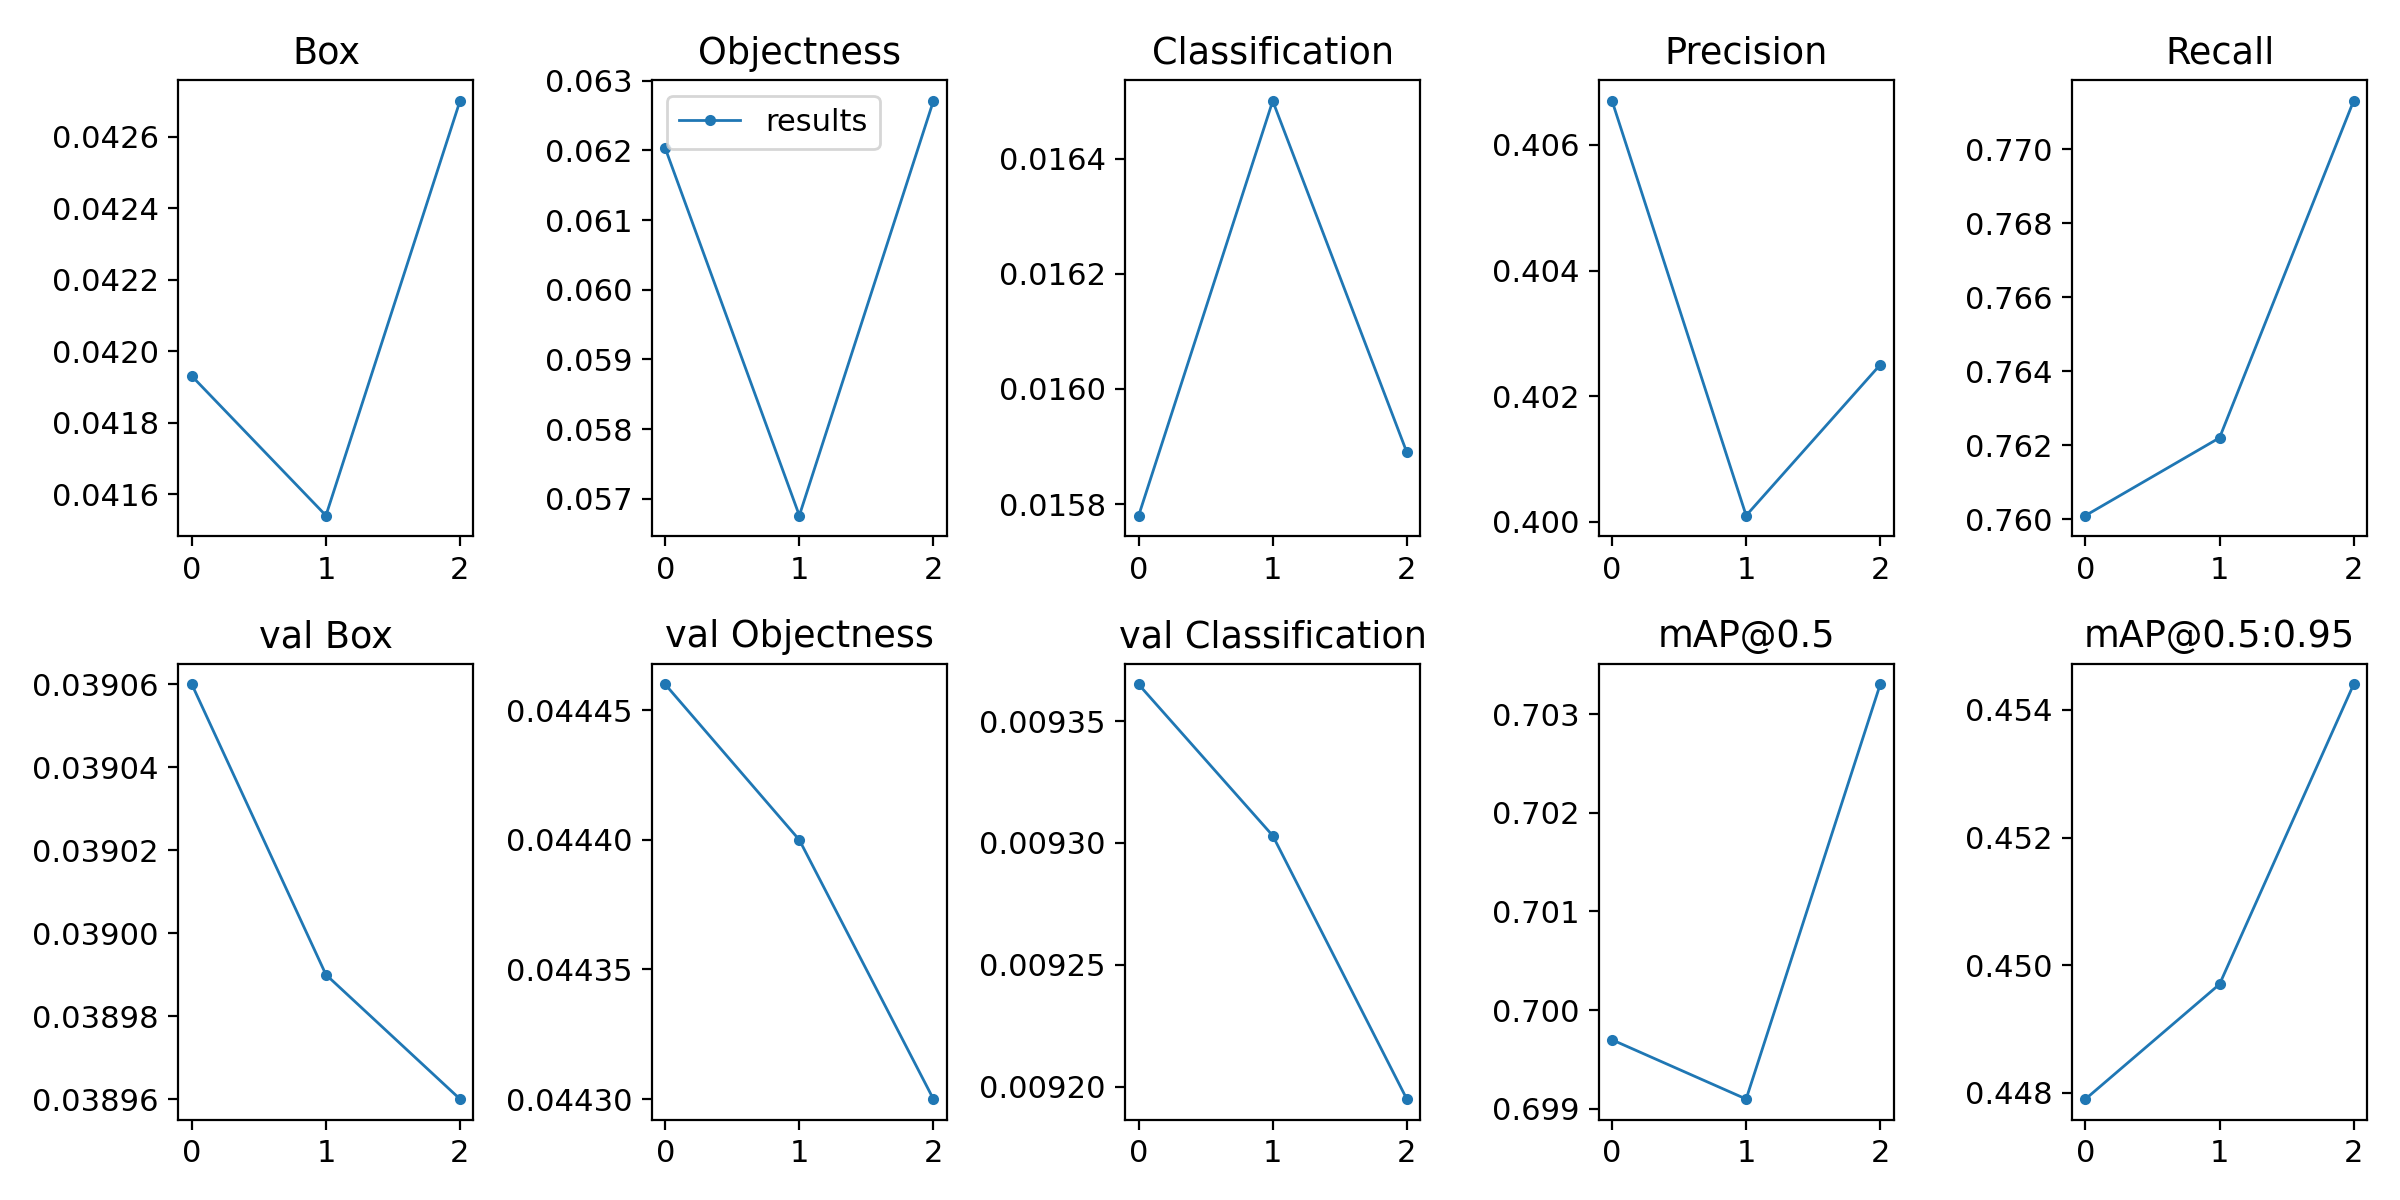

In [14]:
from utils.plots import plot_results 
plot_results(save_dir='runs/train/exp')  # plot all results*.txt as results.png
Image(filename='runs/train/exp/results.png', width=800)

<img src="https://user-images.githubusercontent.com/26833433/97808309-8182b180-1c66-11eb-8461-bffe1a79511d.png" width="800">


# Environments

YOLOv5 may be run in any of the following up-to-date verified environments (with all dependencies including [CUDA](https://developer.nvidia.com/cuda)/[CUDNN](https://developer.nvidia.com/cudnn), [Python](https://www.python.org/) and [PyTorch](https://pytorch.org/) preinstalled):

- **Google Colab Notebook** with free GPU: <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
- **Kaggle Notebook** with free GPU: [https://www.kaggle.com/ultralytics/yolov5](https://www.kaggle.com/ultralytics/yolov5)
- **Google Cloud** Deep Learning VM. See [GCP Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/GCP-Quickstart) 
- **Docker Image** https://hub.docker.com/r/ultralytics/yolov5. See [Docker Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/Docker-Quickstart) ![Docker Pulls](https://img.shields.io/docker/pulls/ultralytics/yolov5?logo=docker)


# Appendix

Optional extras below. Unit tests validate repo functionality and should be run on any PRs submitted.


In [ ]:
# Re-clone repo
%cd ..
%rm -rf yolov5 && git clone https://github.com/ultralytics/yolov5
%cd yolov5

In [ ]:
# Test all models
%%shell
for x in s m l x
do
  python test.py --weights yolov5$x.pt --data coco.yaml --img 640
done

In [ ]:
# Run unit tests
%%shell
# git clone https://github.com/ultralytics/yolov5
# cd yolov5
pip install -qr requirements.txt onnx

export PYTHONPATH="$PWD" # to run *.py. files in subdirectories
for x in yolov5s #yolov5m yolov5l yolov5x # models
do
  rm -rf runs
  python train.py --weights $x.pt --cfg $x.yaml --epochs 3 --img 320 --device 0  # train
  for di in 0 cpu # inference devices
  do
    python detect.py --weights $x.pt --device $di  # detect official
    python detect.py --weights runs/train/exp/weights/last.pt --device $di  # detect custom
    python test.py --weights $x.pt --device $di # test official
    python test.py --weights runs/train/exp/weights/last.pt --device $di # test custom
  done
  python models/yolo.py --cfg $x.yaml # inspect
  python models/export.py --weights $x.pt --img 640 --batch 1 # export
done

In [ ]:
# VOC
for b, m in zip([64, 48, 32, 16], ['yolov5s', 'yolov5m', 'yolov5l', 'yolov5x']):  # zip(batch_size, model)
  !python train.py --batch {b} --weights {m}.pt --data voc.yaml --epochs 50 --cache --img 512 --nosave --hyp hyp.finetune.yaml --project VOC --name {m}